# ml-1m data_analysis

In [55]:
# Step 1: import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

user_df = pd.read_csv('atomic_datasets/ml-1m/ml-1m.user', sep='\t')
item_df = pd.read_csv('atomic_datasets/ml-1m/ml-1m.item', sep='\t')
inter_df = pd.read_csv('atomic_datasets/ml-1m/ml-1m.inter', sep='\t')

print(user_df.nunique())
print(item_df.nunique())
print(inter_df.nunique())
print(f"Before removing duplicates: {inter_df.shape}")

user_id:token       6040
gender:token           2
age:token              7
occupation:token      21
zip_code:token      3439
dtype: int64
item_id:token         3883
movie_title:token     3833
release_year:token     348
genre:token_seq        301
dtype: int64
user_id:token        6040
item_id:token        3706
rating:float            5
timestamp:float    458455
dtype: int64
Before removing duplicates: (1000209, 4)


In [56]:
# remove duplicates based on user_id and item_id
inter_df = inter_df.drop_duplicates(subset=['user_id:token', 'item_id:token'])

print(f"After removing duplicates: {inter_df.shape}")

After removing duplicates: (1000209, 4)


In [50]:
n_users = inter_df['user_id:token'].nunique()
n_items = inter_df['item_id:token'].nunique()
n_interactions = inter_df.shape[0]
sparsity = 1 - (n_interactions / (n_users * n_items))
print(f"Dataset Sparsity: {sparsity:.4%}")

Dataset Sparsity: 95.5316%


In [15]:
print("User Data:")
display(user_df.head())
print("Item Data:")
display(item_df.head())
print("Interaction Data:")
display(inter_df.head())

User Data:


,user_id:token,gender:token,age:token,occupation:token,zip_code:token
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Item Data:


,item_id:token,movie_title:token,release_year:token,genre:token_seq
0,1,Toy Story,1995,Animation Children's Comedy
1,2,Jumanji,1995,Adventure Children's Fantasy
2,3,Grumpier Old Men,1995,Comedy Romance
3,4,Waiting to Exhale,1995,Comedy Drama
4,5,Father of the Bride Part II,1995,Comedy


Interaction Data:


,user_id:token,item_id:token,rating:float,timestamp:float
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


## 1. user_df data analysis

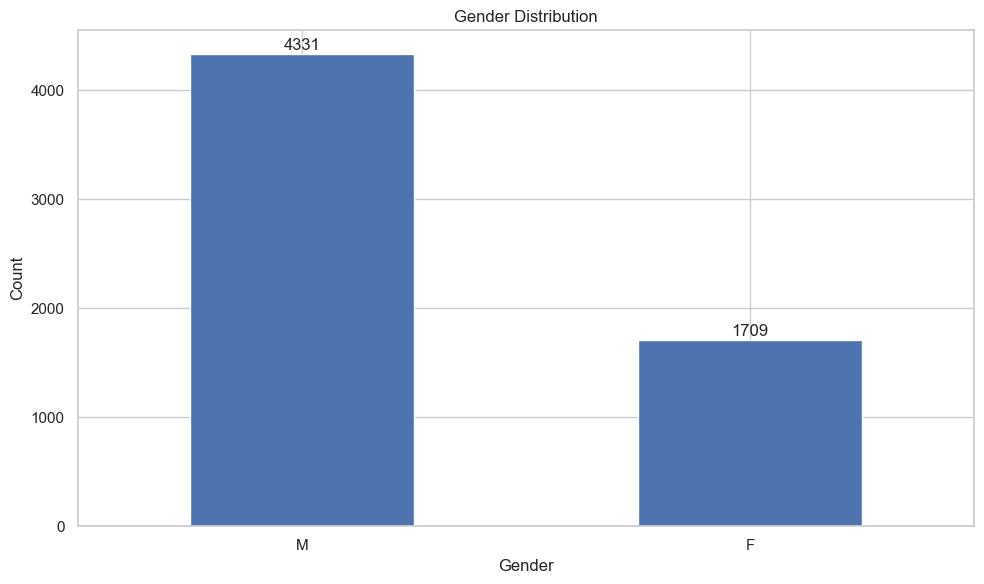

In [16]:
# gender distribution
gender_counts = user_df['gender:token'].value_counts()

# 绘制柱状图
ax = gender_counts.plot(kind='bar', title='Gender Distribution', rot=0)

# 添加每个柱子的数值标签
for i, count in enumerate(gender_counts):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

# 展示图形
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


User Activity Statistics:
count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: count, dtype: float64


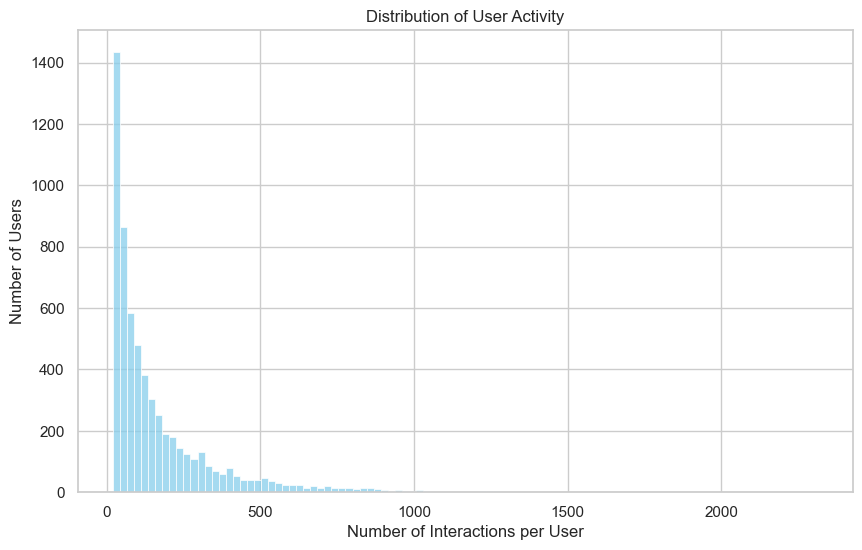

In [59]:
# user activity distribution
user_activity = inter_df['user_id:token'].value_counts()

print("User Activity Statistics:")
print(user_activity.describe())

plt.figure(figsize=(10, 6))
sns.histplot(user_activity, bins=100, kde=False, color='skyblue')
plt.title("Distribution of User Activity")
plt.xlabel("Number of Interactions per User")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()

## 2. item_df data analysis

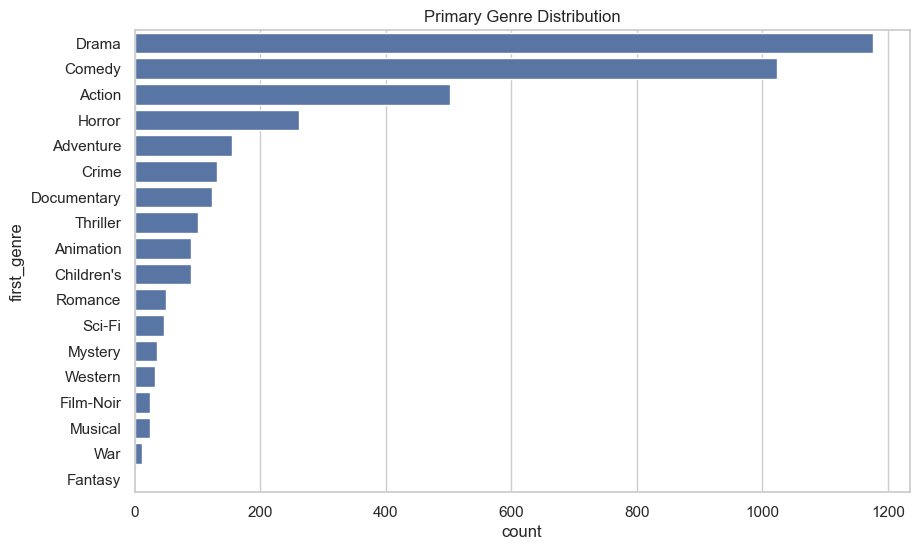

In [18]:
item_df['first_genre'] = item_df['genre:token_seq'].apply(lambda x: str(x).split()[0] if pd.notnull(x) else 'Unknown')
sns.countplot(data=item_df, y='first_genre', order=item_df['first_genre'].value_counts().index)
plt.title('Primary Genre Distribution')
plt.show()

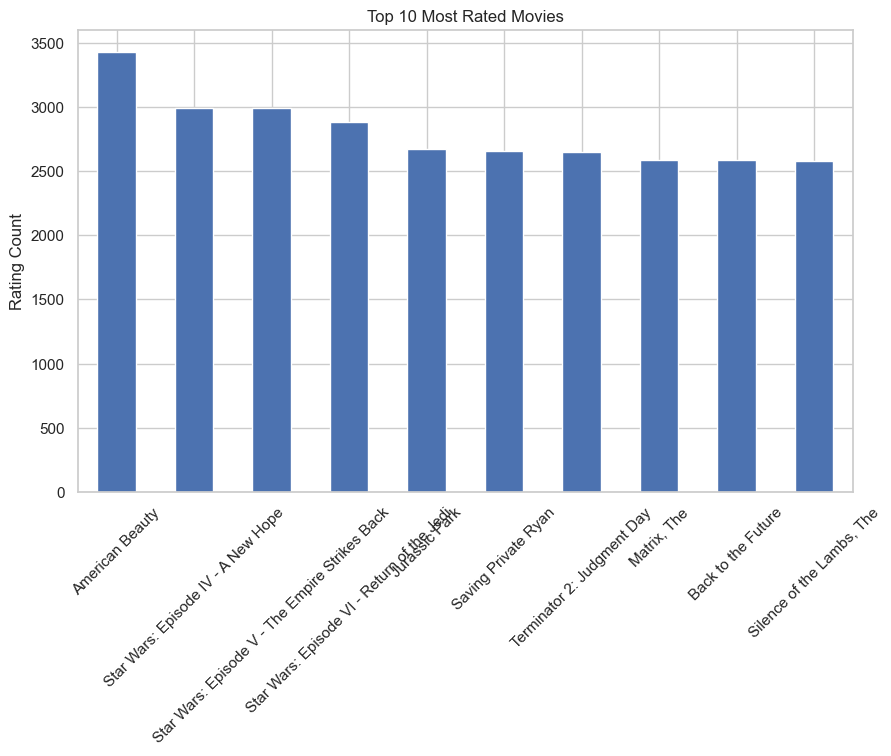

In [19]:
top_items = inter_df['item_id:token'].value_counts().head(10)
top_items_names = item_df[item_df['item_id:token'].isin(top_items.index)][['item_id:token', 'movie_title:token']]
top_items_names = top_items_names.set_index('item_id:token').loc[top_items.index]
top_items.index = top_items_names['movie_title:token'].values
top_items.plot(kind='bar')
plt.title('Top 10 Most Rated Movies')
plt.ylabel('Rating Count')
plt.xticks(rotation=45)
plt.show()

Item Popularity Statistics:
count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: count, dtype: float64


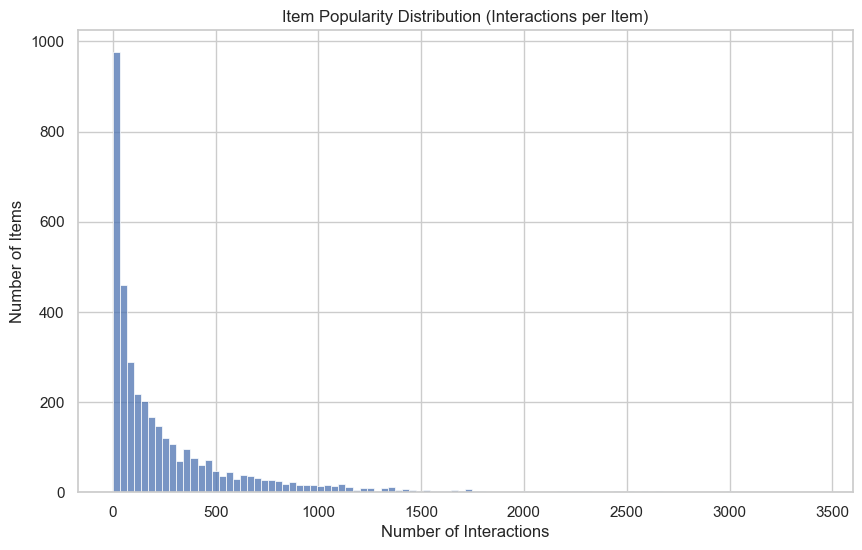

In [60]:
item_popularity = inter_df['item_id:token'].value_counts()
print("Item Popularity Statistics:")
print(item_popularity.describe())

sns.histplot(item_popularity, bins=100, kde=False)
plt.title('Item Popularity Distribution (Interactions per Item)')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Items')
plt.show()  

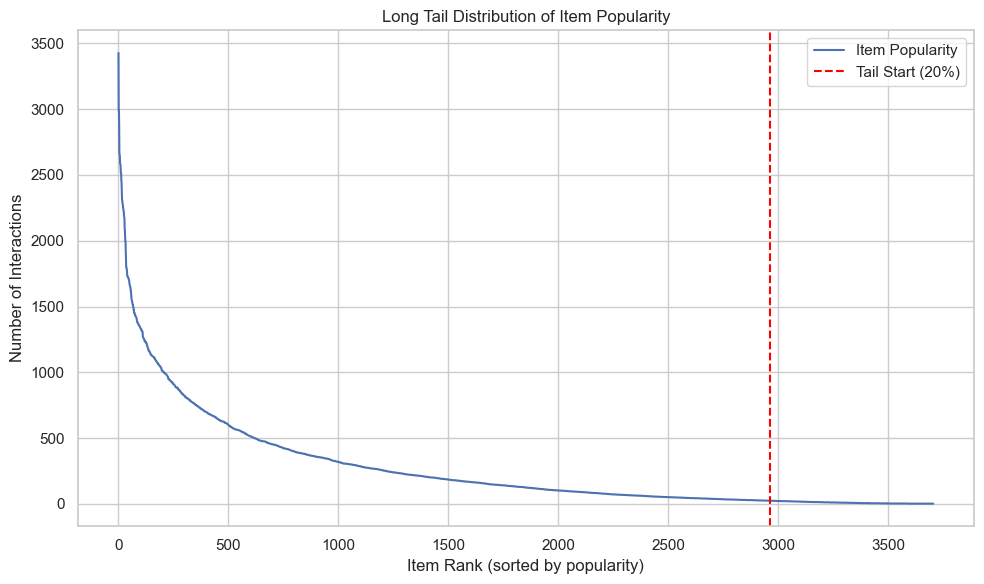

In [37]:
# Calculate item popularity
item_popularity = inter_df['item_id:token'].value_counts()

# Sort popularity in descending order
sorted_popularity = item_popularity.sort_values(ascending=False).reset_index(drop=True)

tail_ratio = 0.2
tail_index = int(len(sorted_popularity) * (1 - tail_ratio))

# Plot: Long-tail with tail cutoff
plt.figure(figsize=(10, 6))
plt.plot(sorted_popularity.values, label='Item Popularity')
plt.axvline(x=tail_index, color='red', linestyle='--', label=f'Tail Start ({int(tail_ratio*100)}%)')
plt.title('Long Tail Distribution of Item Popularity')
plt.xlabel('Item Rank (sorted by popularity)')
plt.ylabel('Number of Interactions')
#plt.yscale('log')  # Optional: log scale for better visibility of tail
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

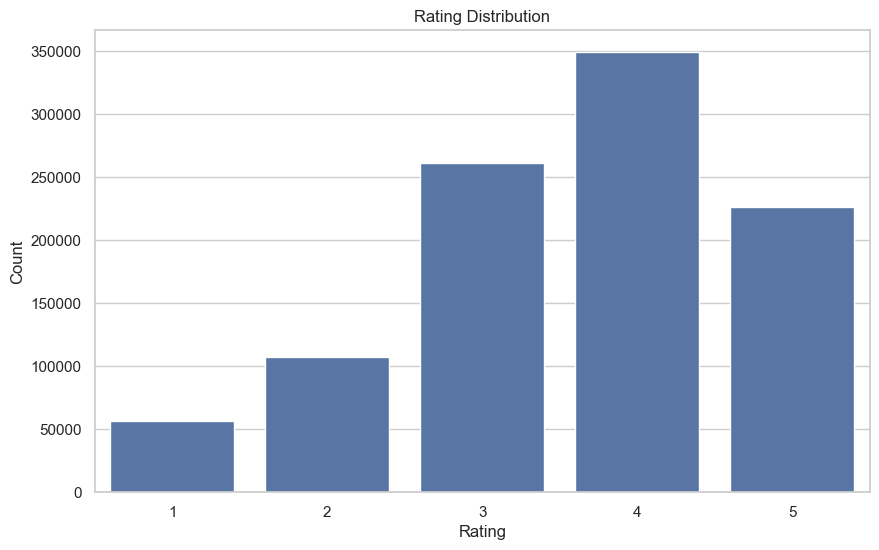

In [22]:
## rating distribution
sns.countplot(data=inter_df, x='rating:float')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()